# Import Statements

In [ ]:
!pip uninstall pandas-profiling

Uninstalling pandas-profiling-2.13.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-2.13.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-2.13.0


In [ ]:
!pip install numpy matplotlib seaborn
!pip install numba==0.48
!pip install aif360==0.2.2
!python -m pip install BlackBoxAuditing
!pip install tensorflow==1.12.0
!pip install --upgrade scikit-learn==0.20.3
!pip install mlxtend --upgrade --no-deps
!pip install --no-binary :all: mlxtend
!pip install -- upgrade xgboost

import sys
#!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install pandas-profiling[notebook]

ERROR: Could not find a version that satisfies the requirement tensorflow==1.12.0 (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3)
ERROR: No matching distribution found for tensorflow==1.12.0
Requirement already up-to-date: scikit-learn==0.20.3 in /usr/local/lib/python3.7/dist-packages (0.20.3)
Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distri

In [ ]:
!pip install --upgrade xgboost 

Requirement already up-to-date: xgboost in /usr/local/lib/python3.7/dist-packages (1.4.1)


In [ ]:
! pip install lime
! pip install shap

In [ ]:

import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

# EDA
from collections import Counter
import pandas_profiling as pp

# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


import warnings

import numpy as np
np.random.seed(0)

from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric, DatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import AdversarialDebiasing
from aif360.explainers import MetricTextExplainer, MetricJSONExplainer

import tensorflow as tf
print(tf.__version__)

from IPython.display import Markdown, display

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import json
from collections import OrderedDict

import xgboost as xgb
print("XGB Version: " + str(xgb.__version__))

# ensembling
from mlxtend.classifier import StackingCVClassifier
import mlxtend
print("mlxtend Version: " + str(mlxtend.__version__))

!pip install mlxtend --upgrade --no-deps
!pip install --no-binary :all: mlxtend

2.4.1
XGB Version: 1.4.1
mlxtend Version: 0.18.0
Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [ ]:
url = 'https://raw.githubusercontent.com/Raven312/RDS-Project/main/heart.csv'
heart_df = pd.read_csv(url)
data = heart_df
data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Exploratory Analysis

In [ ]:
data.describe()

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [ ]:
# missing data detection
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
count = 0
for i in data.isnull().sum(axis = 1):
    if i>0:
        count = count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  0
since it is only 0 percent of the entire dataset the rows with missing values are excluded.


In [ ]:
data.dropna(axis = 0,inplace = True)

In [ ]:
profile = pp.ProfileReport(data)
# profile.to_widgets()
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# save profile to a html report
profile.to_file("heart_data_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

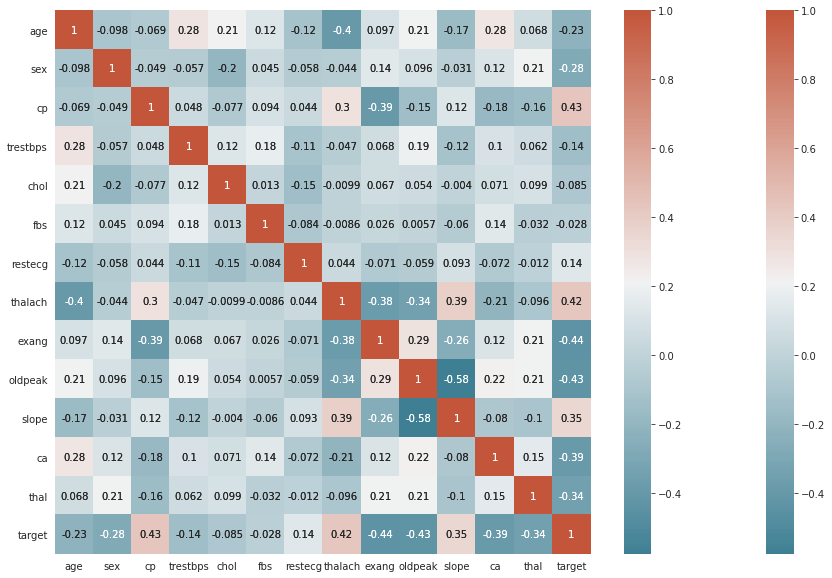

In [ ]:
corr = data.corr()
plt.subplots(figsize = (15,10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap = True))
sns.heatmap(corr, xticklabels = corr.columns,
            yticklabels = corr.columns, 
            annot = True,
            cmap = sns.diverging_palette(220, 20, as_cmap = True))

Observation: 
*   positive correlation between chest pain (cp) & target (our predictor). 
*   negative correlation between exercise induced angina (exang) & our predictor.



# Model Preparation

In [ ]:
y = data["target"]
X = data.drop('target',axis=1)

indices = np.arange(len(X)) # we want to keep track of which indices are split into test and train
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X,
                                                                         y,
                                                                         indices,
                                                                         test_size = 0.20,
                                                                         random_state = 0)

In [ ]:
# let's also get the index of the rows that are female and male

idx_female = np.array(data[data['sex'] == 0].index)
idx_male = np.array(data[data['sex'] == 1].index)

In [ ]:
print("Training data - male/female breakdown")
print("Male: ", len(np.intersect1d(idx_train, idx_male)))
print("Female: ", len(np.intersect1d(idx_train, idx_female)))

Training data - male/female breakdown
Male:  163
Female:  79


In [ ]:
print("Test data - male/female breakdown")
print("Male: ", len(np.intersect1d(idx_test, idx_male)))
print("Female: ", len(np.intersect1d(idx_test, idx_female)))

Test data - male/female breakdown
Male:  44
Female:  17


Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [ ]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 111, 1: 131})

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

# Modeling /Training

Here I take different machine learning algorithm and try to find algorithm which predict accurately.

* Logistic Regression
* Naive Bayes
* Random Forest Classifier
* Extreme Gradient Boost
* K-Nearest Neighbour
* Decision Tree
* Support Vector Machine


In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[21  6]
 [ 4 30]]


Accuracy of Logistic Regression: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[21  6]
 [ 3 31]]


Accuracy of Naive Bayes model: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators = 20, random_state = 12,max_depth = 5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[22  5]
 [ 3 31]]


Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 25, max_depth = 15,gamma = 0.6, subsample = 0.52,colsample_bytree = 0.6,seed = 27, 
                    reg_lambda = 2, booster = 'dart', colsample_bylevel = 0.6, colsample_bynode = 0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

[18:56:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


confussion matrix
[[24  3]
 [ 3 31]]


Accuracy of Extreme Gradient Boost: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

   micro avg       0.90      0.90      0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[24  3]
 [ 4 30]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

   micro avg       0.89      0.89      0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[23  4]
 [ 7 27]]


Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel = 'rbf', C = 2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



Precision, Recall, F1-score and Support:
* Precision : be “how many are correctly classified among that class”
* Recall : “how many of this class you find over the whole number of element of this class”
* F1-score : harmonic mean of precision and recall values.
  F1 score reaches its best value at 1 and worst value at 0.
  F1 Score = 2 x ((precision x recall) / (precision + recall))

* Support: # of samples of the true response that lie in that class.

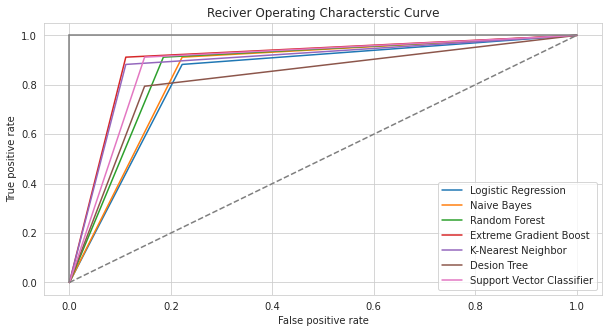

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls = '--')
plt.plot([0,0],[1,0],c = '.5')
plt.plot([1,1],c = '.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Model Evaluation


In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

Model   Accuracy
0     Logistic Regression  83.606557
1             Naive Bayes  85.245902
2           Random Forest  86.885246
3  Extreme Gradient Boost  90.163934
4     K-Nearest Neighbour  88.524590
5           Decision Tree  81.967213
6  Support Vector Machine  88.524590

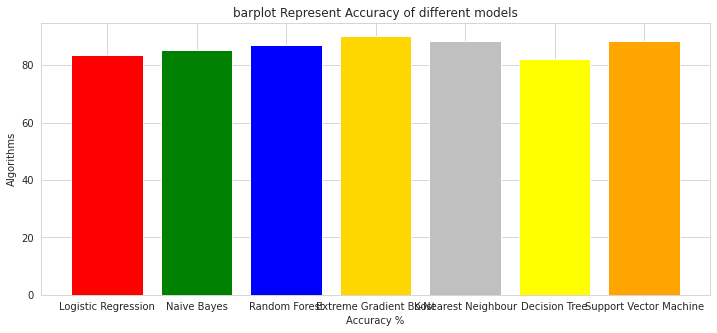

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

## Ensembling

In [ ]:
scv = StackingCVClassifier(classifiers = [xgb,knn,svc], meta_classifier = svc, random_state = 42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

[18:56:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:56:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:56:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[24  3]
 [ 3 31]]


Accuracy of StackingCVClassifier: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoi

Conclusion

1) Extreme Gradient Boost gives the best Accuracy compared to other models.

2) Exercise induced angina,Chest pain is major symptoms of heart attack.

3) Ensembling technique increase the accuracy of the model.

# Fairness Measures

In [ ]:
print("Performance for female subpopulation \n")
scv_predicted_female = scv.predict(X_test[np.isin(idx_test, idx_female)])
scv_conf_matrix_female = confusion_matrix(np.array(y_test)[np.isin(idx_test, idx_female)], 
                                          scv_predicted_female)
scv_acc_score_female = accuracy_score(np.array(y_test)[np.isin(idx_test, idx_female)], 
                                      scv_predicted_female)
print("confussion matrix")
print(scv_conf_matrix_female)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score_female*100,'\n')

print(classification_report(np.array(y_test)[np.isin(idx_test, idx_female)],
                            scv_predicted_female))

Performance for female subpopulation 

confussion matrix
[[ 4  2]
 [ 0 11]]


Accuracy of StackingCVClassifier: 88.23529411764706 

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.85      1.00      0.92        11

   micro avg       0.88      0.88      0.88        17
   macro avg       0.92      0.83      0.86        17
weighted avg       0.90      0.88      0.88        17



In [ ]:
print("Performance for male subpopulation \n")
scv_predicted_male = scv.predict(X_test[np.isin(idx_test, idx_male)])
scv_conf_matrix_male = confusion_matrix(np.array(y_test)[np.isin(idx_test, idx_male)], 
                                          scv_predicted_male)
scv_acc_score_male = accuracy_score(np.array(y_test)[np.isin(idx_test, idx_male)], 
                                      scv_predicted_male)
print("confussion matrix")
print(scv_conf_matrix_male)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score_male*100,'\n')

print(classification_report(np.array(y_test)[np.isin(idx_test, idx_male)],
                            scv_predicted_male))

Performance for male subpopulation 

confussion matrix
[[20  1]
 [ 3 20]]


Accuracy of StackingCVClassifier: 90.9090909090909 

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.95      0.87      0.91        23

   micro avg       0.91      0.91      0.91        44
   macro avg       0.91      0.91      0.91        44
weighted avg       0.91      0.91      0.91        44



In [ ]:
# calculate the difference in accuracy
scv_acc_score_male - scv_acc_score_female

# the accuracy for males is 3% higher than for females

0.0267379679144385

In [ ]:
# calculate the diff in FPR = FP/(FP + TN)

tn_m, fp_m, fn_m, tp_m = scv_conf_matrix_male.ravel()
tn_f, fp_f, fn_f, tp_f = scv_conf_matrix_female.ravel()

fpr_m = fp_m / (fp_m + tn_m)
fpr_f = fp_f / (fp_f + tn_f)

print("Male FPR: ", fpr_m, "Female FPR: ", fpr_f)

# false positive rate much higher for females than males

Male FPR:  0.047619047619047616 Female FPR:  0.3333333333333333


In [ ]:
# calculate the diff in FNR = FN/(FN + TP)

fnr_m = fn_m / (fn_m + tp_m)
fnr_f = fn_f / (fn_f + tp_f)

print("Male FNR: ", fnr_m, "Female FNR: ", fnr_f)

# false negative rate much higher for males than females

Male FNR:  0.13043478260869565 Female FNR:  0.0


# Interpretability

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


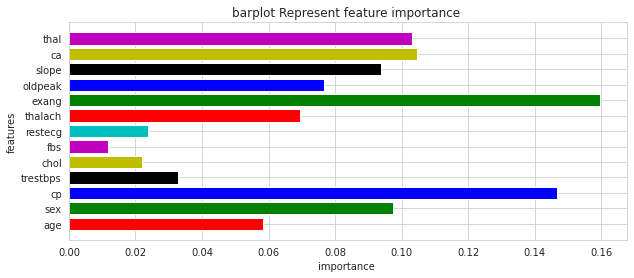

In [ ]:
# look at the feature importance using built-in feature importance function
# Extreme Gradient Boost

imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize = (10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

The XGBoost uses the coverage to
reflect importance of a feature, which denotes the percentage cases in which a feature is utilized during the decision
pathway of making the final prediction.


## LIME

The LIME use a single datapoint in a ML algorithm, and it will build understandable explanation for the output of the ML algorithm for the specific datapoint.

In [ ]:
# look at feature importance using LIME for the overall classifier
# Xgboost

In [ ]:
xgb_cols = ["thal", "ca", "exang", "fbs", "restecg", "cp", "sex"]
for col in xgb_cols:
    print(f"{col}: {data[col].unique()}")

thal: [1 2 3 0]
ca: [0 2 1 3 4]
exang: [0 1]
fbs: [1 0]
restecg: [0 1 2]
cp: [3 2 1 0]
sex: [1 0]


In [ ]:
feature_names = data.columns
feature_names = list(feature_names)
xgb_indices = [feature_names.index(col) for col in xgb_cols]
xgb_indices

[12, 11, 8, 5, 6, 2, 1]

In [ ]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, discretize_continuous = True,
                                                   class_names = ['no risk', 'risk of heart'], 
                                                   mode = "classification",
                                                   feature_names = feature_names,
                                                   categorical_features = xgb_indices,
                                                   categorical_names = [], 
                                                   kernel_width = 10, verbose = True)

In [ ]:
y_xgbpred = xgb.predict(X_test)
y_xgbproba = xgb.predict_proba(X_test)

# incorrect sample
index_incorrect = np.where(y_xgbpred != y_test)[0][0]
print(index_incorrect)

# correct sample
index_correct = np.where(y_xgbpred == y_test)[0][0]
print(index_correct)

1
0


/usr/local/lib/python3.7/dist-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [ ]:
# incorrect sample with lime
exp = explainer.explain_instance(X_test[index_incorrect], xgb.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False)
print(f'Predicted Heart Disease Risk (0 = no, 1 = yes): {y_xgbpred[index_incorrect]}','\n')
print(f'Actual Prediction: {y_test.iloc[index_incorrect]}')

Intercept 0.5129159429585941
Prediction_local [0.49535049]
Right: 0.4823915


Predicted Heart Disease Risk (0 = no, 1 = yes): 0 

Actual Prediction: 1


In this case, the datapoint shows the top features' change: exang and cp from the LIME list of top features, and the LIME weights indicate less heavily on the risk of heart. However, the actual prediction is on the risk of heart and not no risk (it is an incorrect sample).

In [ ]:
# correct sample with lime
exp = explainer.explain_instance(X_test[index_correct], xgb.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False)
print(f'Predicted Heart Disease Risk (0 = no, 1 = yes): {y_xgbpred[index_correct]}','\n')
print(f'Actual Prediction: {y_test.iloc[index_correct]}')

Intercept 0.5422770717365779
Prediction_local [0.44410727]
Right: 0.45555094


Predicted Heart Disease Risk (0 = no, 1 = yes): 0 

Actual Prediction: 0


In the second case, the datapoint predicts heavily on the risk of heart, but the LIME weights indicated fully on the risk of heart side. And the prediction is on the side of no risk. The LIME weights are inconsistent. Compared with the feature importance in XGboost, the LIME weights share 1-2 top features such as exang, with some lower-ranked features.

Observations: Though sometimes the LIME weights are consistent with the prediction, and sometimes completely opposite. However, the results share some of the top features. Hence, this is reasonable because LIME explains individual data points, and comparing to feature importance in Xgboost in general, the single points in LIME might be vary from global perspectives. 

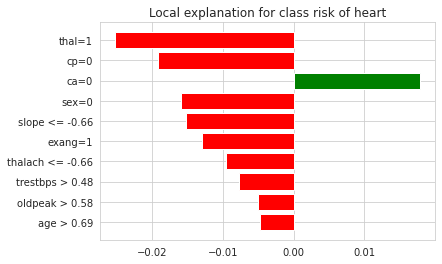

In [ ]:
# Visualize the explanation 
%matplotlib inline
fig = exp.as_pyplot_figure()

## SHAP

SHAP analysis assigns a SHAP value for a feature in each case specifically. This reflects the impact on the feature (measured as deviation from the mean predicted value). Further, while different combinations of features are used to predict the target value of a case.

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
y = data["target"]
X = data.drop('target',axis=1)

indices = np.arange(len(X)) # we want to keep track of which indices are split into test and train
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X,
                                                                         y,
                                                                         indices,
                                                                         test_size = 0.20,
                                                                         random_state = 0)

In [ ]:
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.68273
[100]	test-logloss:0.45630
[200]	test-logloss:0.38217
[300]	test-logloss:0.35114
[400]	test-logloss:0.33616
[450]	test-logloss:0.33420


In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

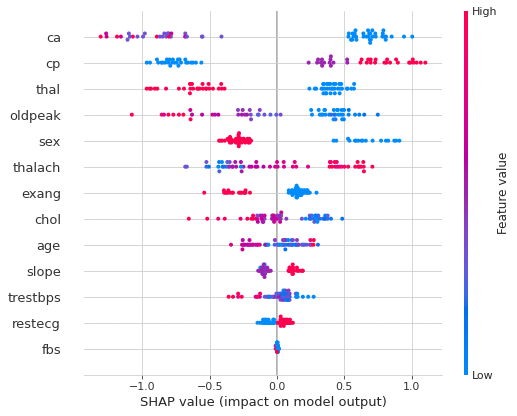

In [ ]:
# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names = feature_names)

This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in risk (such that a high cp leads to a high risk of heart disease)

The number of major vessels "ca" is pretty clear, and it's saying that low values are bad (blue on the right). The thalassemia thal is clear (yes = red = good, no = blue = bad).

You can see some clear separation in many of the other features. Exercise induced angina 'exang' has a clear separation, although as 'no' (blue) increases the probability.

It's also odd for men (red) have a negative chance of heart disease in this model. It shoud be men has a greater chance in getting heart disease. 

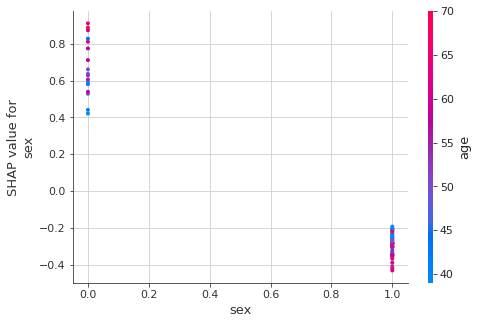

In [ ]:
# we pass display_features so we get text display values for sex
# The dependence plot
shap.dependence_plot("sex", shap_values, X_test, feature_names = feature_names)

The dependence plot tells whether the relationship between the target and the variable is linear, monotonic, or more complex. Suppose we want to get the dependence plot of “sex”. The module SHAP includes automatically another variable that “sex” interacts most with which is age.

In [ ]:
# Prediction Decomposition
# individual force plot
X_test.mean()

age          52.442623
sex           0.721311
cp            0.967213
trestbps    130.901639
chol        244.295082
fbs           0.147541
restecg       0.557377
thalach     148.934426
exang         0.295082
oldpeak       0.945902
slope         1.360656
ca            0.737705
thal          2.409836
dtype: float64

In [ ]:
X_test.iloc[10,:]

age          57.0
sex           1.0
cp            2.0
trestbps    150.0
chol        126.0
fbs           1.0
restecg       1.0
thalach     173.0
exang         0.0
oldpeak       0.2
slope         2.0
ca            1.0
thal          3.0
Name: 111, dtype: float64

In [ ]:
# plot the SHAP values for the 10th observation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10,:], X_test.iloc[10,:])


We predicted 72%, whereas the base_value is 14.16%. Feature values causing increased predictions are in pink, and we can see the visual size shows the magnitude of the feature's effect, and also that feature values decreasing the prediction are in blue. In this example, we can see that the biggest impacts come from the features "cp" and "oldpeak" which are strongly positive.

In [ ]:
# plot the SHAP values for the 26th observation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[26,:], X_test.iloc[26,:])

We predicted -2.02, whereas the base_value is 14.16%. Feature values causing increased predictions are in pink, and we can see the visual size shows the magnitude of the feature's effect, and also that feature values decreasing the prediction are in blue. In this example, we can see that the biggest impacts come from the features "ca" = 2 and "cp" = 0 which are strongly negative for the heart disease risk.

In [ ]:
# The collective force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

It shows the predictions and influencing factors for many (in this case 61) patients, and it is interactive. We can observe each person ended up either red (prediction of disease) or blue (prediction of no disease)

The above Y-axis is the X-axis of the individual force plot.

In [ ]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_test.iloc[:30,:])

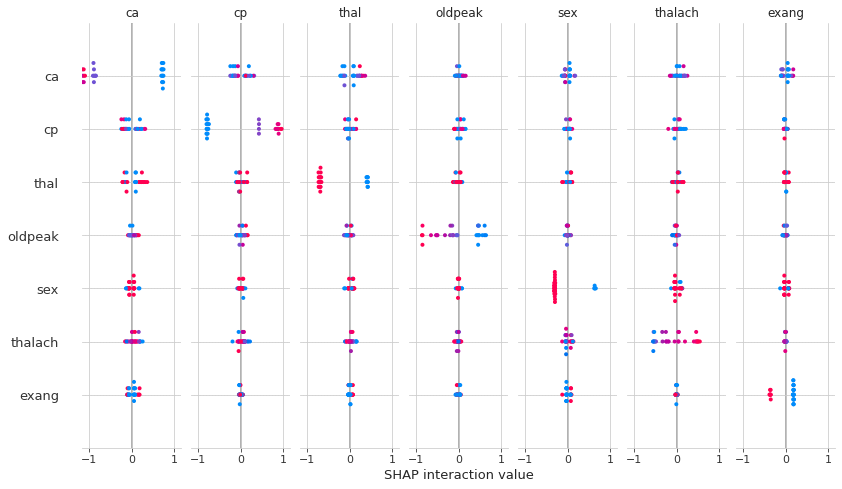

In [ ]:
# A summary plot of a SHAP interaction value matrix plots a matrix of summary plots with the main effects on the diagonal and the interaction effects off the diagonal.
shap.summary_plot(shap_interaction_values, X_test.iloc[:30,:])

The SHAP values do not identify causality, which is better identified by experimental design or similar approaches. 

# Synthetic Data

1. First concern: privacy protection - can we achieve the same performance with a synthetic dataset

2. Second concern: can we actually improve the performance by producing a synthetic dataset that is balanced?

Possible reference: https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

Male Records account for 68 percent of the dataset and female records for 32 percent. This might result in model trained on dataset on male symptoms and shows bad performance on female symptoms. 

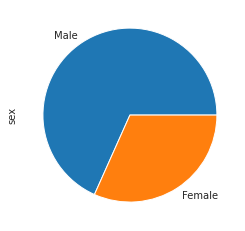

In [ ]:
# Plot distribution of sex
counts = data['sex'].value_counts().sort_values(ascending = False)
counts.rename({1:"Male", 0:"Female"}).plot.pie()

Regards with privacy protection, the training with differential privacy is not necessary in the synthetic data because the dataset has been de-identified in the first place.

Hence, we would like to use DataSynthesizer to generate additional female patients to mitigate the gender bias. We hope that the mitigated synthetic datsets can improve prediction for both male and female patientis equally.

In [ ]:
# Install DataSynthesizer
!pip install DataSynthesizer

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [ ]:
# Import packages
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

In [ ]:
# Intialize a describer and a generator
describer = DataDescriber()
generator = DataGenerator()

In [ ]:
sensitive_data_file = 'https://raw.githubusercontent.com/Raven312/RDS-Project/main/heart.csv'

In [ ]:
# Set up some paths
description_files = {'random mode':                   'description(random).json', 
                     'independent attribute mode':    'description(independent).json', 
                     'correlated attribute mode':     'description(correlated).json'}
synthetic_data_files = {'random mode':                'synthetic data(random).csv', 
                        'independent attribute mode': 'synthetic data(independent).csv', 
                        'correlated attribute mode':  'synthetic data(correlated).csv'}


output_data_size = 1000

In [ ]:
# Read in the data
real_data = pd.read_csv(sensitive_data_file)
real_data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

### Random Mode

In [ ]:
describer.describe_dataset_in_random_mode(sensitive_data_file)

In [ ]:
describer.save_dataset_description_to_file(description_files['random mode'])

In [ ]:
generator.generate_dataset_in_random_mode(n = output_data_size, 
                                          description_file = description_files['random mode'], 
                                          seed=0, 
                                          minimum=0, 
                                          maximum=100)

In [ ]:
generator.save_synthetic_data(synthetic_data_files['random mode'])

In [ ]:
synthetic_random = pd.read_csv(synthetic_data_files['random mode'])

In [ ]:
real_data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [ ]:
synthetic_random.head()

age  sex  cp  trestbps  chol  fbs  ...  exang    oldpeak  slope  ca  thal  target
0   44    1   3        97    95    1  ...      1  29.243083      0   4     3       1
1   47    0   2        13    85    1  ...      1  89.444372      0   0     3       1
2   64    1   2        19    52    0  ...      0  10.599041      2   3     2       0
3   67    0   3        41     7    0  ...      0  45.238332      1   0     1       1
4   67    0   1        76    36    1  ...      1  69.528239      1   0     1       1

[5 rows x 14 columns]

## Independent attribute mode

In independent attribute mode, we replace the feature we want to protect with values that follow the same distribution as the original data. However, we do not consider any other features when determining the new value for the sensitive feature. 

In [ ]:
describer.describe_dataset_in_independent_attribute_mode(sensitive_data_file, epsilon = 0.1)

In [ ]:
describer.save_dataset_description_to_file(description_files['independent attribute mode'])

In [ ]:
generator.generate_dataset_in_independent_mode(n = output_data_size, 
                                          description_file = description_files['independent attribute mode'], 
                                          seed = 0)

In [ ]:
generator.save_synthetic_data(synthetic_data_files['independent attribute mode'])

In [ ]:
synthetic_independent = pd.read_csv(synthetic_data_files['independent attribute mode'])

In [ ]:
synthetic_independent.head()

age  sex  cp  trestbps   chol  ...   oldpeak  slope  ca  thal  target
0  57.0    0   3     136.0  262.0  ...  5.227991      1   0     1       0
1  62.0    0   1     162.0  278.0  ...  5.737488      1   0     2       0
2  61.0    0   1     162.0  262.0  ...  5.027905      1   0     1       0
3  56.0    1   1     183.0  261.0  ...  1.725951      1   0     1       0
4  49.0    0   1     164.0  218.0  ...  0.008856      1   2     1       0

[5 rows x 14 columns]

## Correlated attribute mode

The correlated attribute mode replaces the feature we want to protect with values based on the *conditional* distribution of all the features in the database. This is calculated using a Bayesian network.

In [ ]:
describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                        epsilon = 0.1, 
                                                        k = 2)

================ Constructing Bayesian Network (BN) ================
Adding ROOT target
Adding attribute trestbps
Adding attribute exang
Adding attribute chol
Adding attribute oldpeak
Adding attribute fbs
Adding attribute sex
Adding attribute restecg
Adding attribute slope
Adding attribute thalach
Adding attribute ca
Adding attribute cp
Adding attribute thal
Adding attribute age
========================== BN constructed ==========================


In [ ]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    trestbps has parents ['target'].
    exang    has parents ['trestbps', 'target'].
    chol     has parents ['trestbps', 'target'].
    oldpeak  has parents ['exang', 'target'].
    fbs      has parents ['oldpeak', 'exang'].
    sex      has parents ['exang', 'target'].
    restecg  has parents ['exang', 'target'].
    slope    has parents ['sex', 'trestbps'].
    thalach  has parents ['restecg', 'sex'].
    ca       has parents ['fbs', 'trestbps'].
    cp       has parents ['thalach', 'slope'].
    thal     has parents ['ca', 'trestbps'].
    age      has parents ['oldpeak', 'chol'].


In [ ]:
describer.save_dataset_description_to_file(description_files['correlated attribute mode'])

Use generator.generate_dataset_in_correlated_attribute_mode to generate synthetic data using the correlated attribute mode:

In [ ]:
# generate synthetic data in correlated attribute mode
# write your code here using: generator.generate_dataset_in_correlated_mode

generator.generate_dataset_in_correlated_attribute_mode(n = output_data_size, 
                                          description_file=description_files['correlated attribute mode'], 
                                          seed = 0)

Again, save the data and read it as a pandas dataframe:

In [ ]:
generator.save_synthetic_data(synthetic_data_files['correlated attribute mode'])

In [ ]:
synthetic_correlated = pd.read_csv(synthetic_data_files['correlated attribute mode'])

Plot the distribution of age in the real data and synthetic data that you generated using the correlated attribute mode:

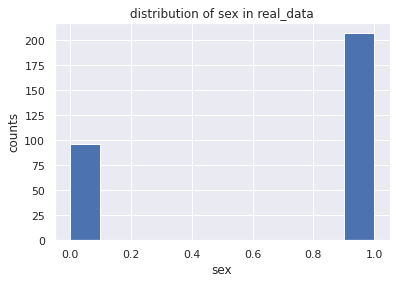

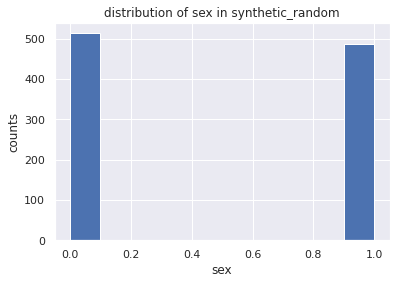

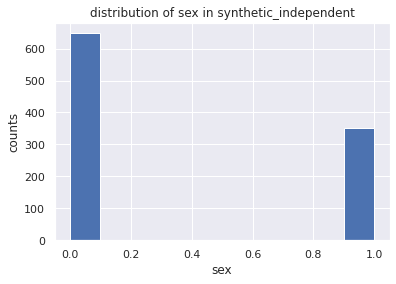

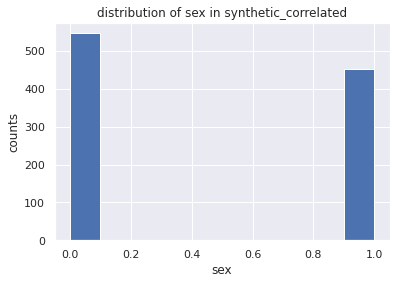

In [ ]:
# plot the distribution of "relationship" in the synthetic data generated under the random mode, independent attribute mode and correlated attribute mode here
fig, (real_data['sex'])

real_data["sex"].hist()
plt.title("distribution of sex in real_data")
plt.xlabel("sex")
plt.ylabel("counts")
plt.show()

synthetic_random["sex"].hist()
plt.title("distribution of sex in synthetic_random")
plt.xlabel("sex")
plt.ylabel("counts")
plt.show()

synthetic_independent["sex"].hist()
plt.title("distribution of sex in synthetic_independent")
plt.xlabel("sex")
plt.ylabel("counts")
plt.show()

synthetic_correlated["sex"].hist()
plt.title("distribution of sex in synthetic_correlated")
plt.xlabel("sex")
plt.ylabel("counts")
plt.show()

## Statistical measures


### Mutual information

We can use mutual information to further understand how the relationships between features are similar/different in the real data and the synthetic data. Mutual information is defined as follows for two discrete variables X and Y:


$$I(X; Y) = \sum_{y \in Y} \sum_{x \in X} p(x,y) \log(\frac{p(x,y)}{p(x)p(y)})$$

Higher values indicate greater levels of mutual information. For two independent variables, the value will be zero (look at the logged term). This metric works for categorical variables *or* continuous variables. 

In [ ]:
from sklearn.metrics import normalized_mutual_info_score

In [ ]:
normalized_mutual_info_score(real_data['sex'], 
                             real_data['target'], 
                             average_method='arithmetic')

0.062409591434231616

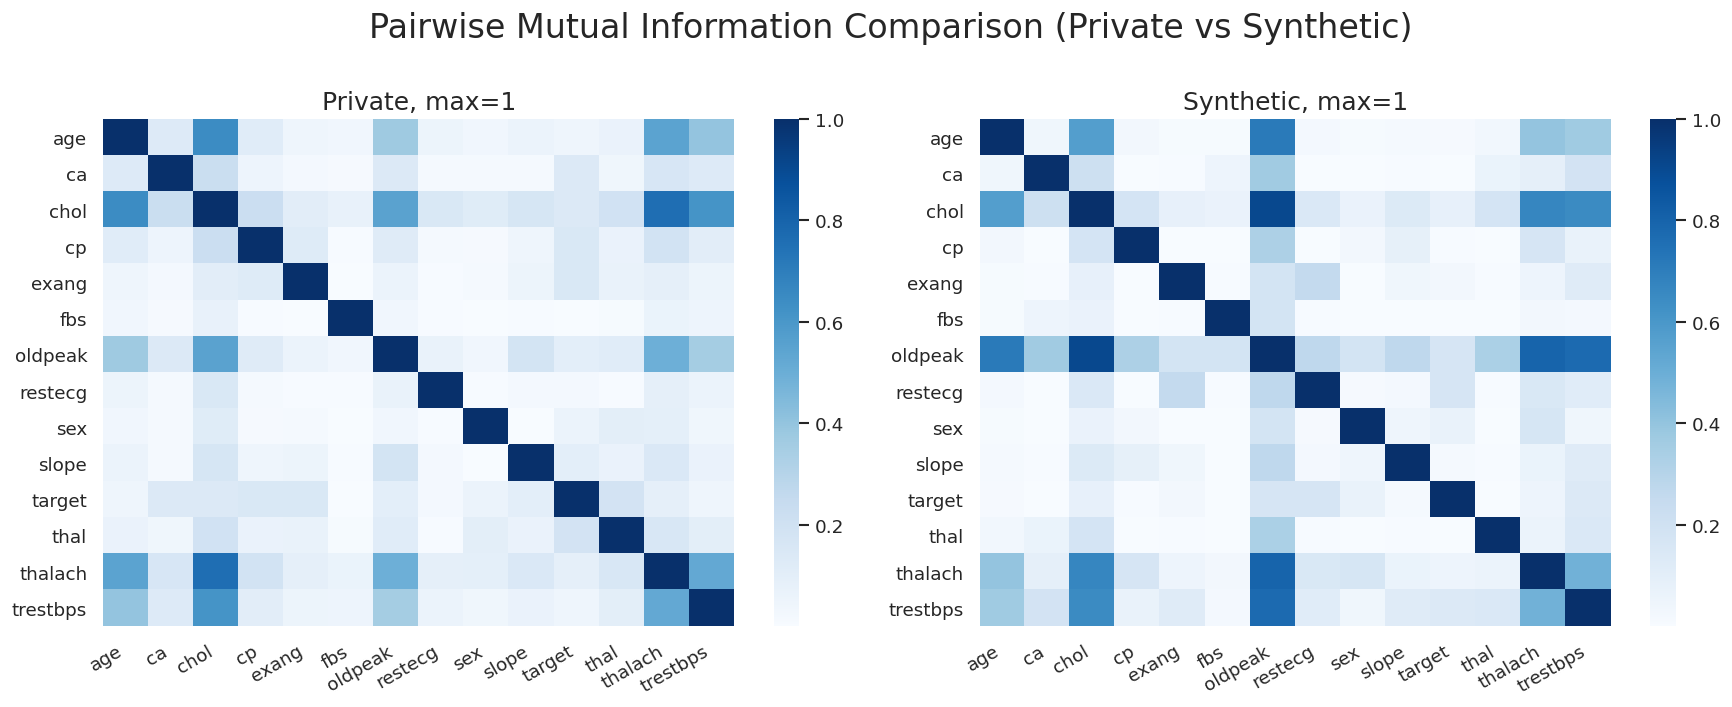

In [ ]:
attribute_description = read_json_file(description_files['correlated attribute mode'])['attribute_description']
ModelInspector(real_data, 
               synthetic_correlated, 
               attribute_description).mutual_information_heatmap()

### KL-divergence

The KL-divergence is an alternative way to measure the difference between two distributions. For two distributions P and Q, the KL-divergence is defined as 

$$D = \sum_x P(x) \log (\frac{P(x)}{Q(X)})$$

This metric works on discrete/categorical variables.


In [ ]:
# Lower the KL divergence value, the better we have matched the true distribution with our approximation.

In [ ]:
from scipy.stats import entropy

In [ ]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

In [ ]:
kl_test(real_data, synthetic_random, 'sex')

0.0832013722453897

In [ ]:
kl_test(real_data, synthetic_correlated, 'sex')

0.11259008021375172

Synthetic_random generates a uniform distribution of sex values. However, it might attribute to overfitting in the model. We will test the synthetic data model based on synthetic correlated mode instead (good approximation of the sex distribution).

# Synthetic Data Model Preparation - Correlated Mode

In [ ]:
y = synthetic_correlated["target"]
X = synthetic_correlated.drop('target',axis=1)

indices = np.arange(len(X)) # we want to keep track of which indices are split into test and train
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X,
                                                                         y,
                                                                         indices,
                                                                         test_size = 0.20,
                                                                         random_state = 0)

In [ ]:
# let's also get the index of the rows that are female and male

idx_female = np.array(synthetic_correlated[synthetic_correlated['sex'] == 0].index)
idx_male = np.array(synthetic_correlated[synthetic_correlated['sex'] == 1].index)

In [ ]:
print("Training data - male/female breakdown")
print("Male: ", len(np.intersect1d(idx_train, idx_male)))
print("Female: ", len(np.intersect1d(idx_train, idx_female)))

Training data - male/female breakdown
Male:  363
Female:  437


In [ ]:
print("Test data - male/female breakdown")
print("Male: ", len(np.intersect1d(idx_test, idx_male)))
print("Female: ", len(np.intersect1d(idx_test, idx_female)))

Test data - male/female breakdown
Male:  90
Female:  110


Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [ ]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 517, 1: 283})

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


## Synthetic Data Modeling / Training

Here we take different machine learning algorithm and try to find algorithm on which predict accurately.

* Logistic Regression
* Naive Bayes
* Random Forest Classifier
* Extreme Gradient Boost
* K-Nearest Neighbour
* Decision Tree
* Support Vector Machine


In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[114  21]
 [ 13  52]]


Accuracy of Logistic Regression: 83.0 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       135
           1       0.71      0.80      0.75        65

   micro avg       0.83      0.83      0.83       200
   macro avg       0.80      0.82      0.81       200
weighted avg       0.84      0.83      0.83       200



Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[118  17]
 [ 15  50]]


Accuracy of Naive Bayes model: 84.0 

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       135
           1       0.75      0.77      0.76        65

   micro avg       0.84      0.84      0.84       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.84      0.84      0.84       200



In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators = 20, random_state = 12,max_depth = 5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[129   6]
 [  9  56]]


Accuracy of Random Forest: 92.5 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       135
           1       0.90      0.86      0.88        65

   micro avg       0.93      0.93      0.93       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.93      0.92       200



In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 25, max_depth = 15,gamma = 0.6, subsample = 0.52,colsample_bytree = 0.6,seed = 27, 
                    reg_lambda = 2, booster = 'dart', colsample_bylevel = 0.6, colsample_bynode = 0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

[18:56:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[132   3]
 [ 18  47]]


Accuracy of Extreme Gradient Boost: 89.5 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       135
           1       0.94      0.72      0.82        65

   micro avg       0.90      0.90      0.90       200
   macro avg       0.91      0.85      0.87       200
weighted avg       0.90      0.90      0.89       200



The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[125  10]
 [ 20  45]]


Accuracy of K-NeighborsClassifier: 85.0 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       135
           1       0.82      0.69      0.75        65

   micro avg       0.85      0.85      0.85       200
   macro avg       0.84      0.81      0.82       200
weighted avg       0.85      0.85      0.85       200



In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[126   9]
 [  7  58]]


Accuracy of DecisionTreeClassifier: 92.0 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       135
           1       0.87      0.89      0.88        65

   micro avg       0.92      0.92      0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200



In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel = 'rbf', C = 2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[123  12]
 [ 12  53]]


Accuracy of Support Vector Classifier: 88.0 

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       135
           1       0.82      0.82      0.82        65

   micro avg       0.88      0.88      0.88       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.88      0.88      0.88       200



Precision, Recall, F1-score and Support:
* Precision : be “how many are correctly classified among that class”
* Recall : “how many of this class you find over the whole number of element of this class”
* F1-score : harmonic mean of precision and recall values.
  F1 score reaches its best value at 1 and worst value at 0.
  F1 Score = 2 x ((precision x recall) / (precision + recall))

* Support: # of samples of the true response that lie in that class.

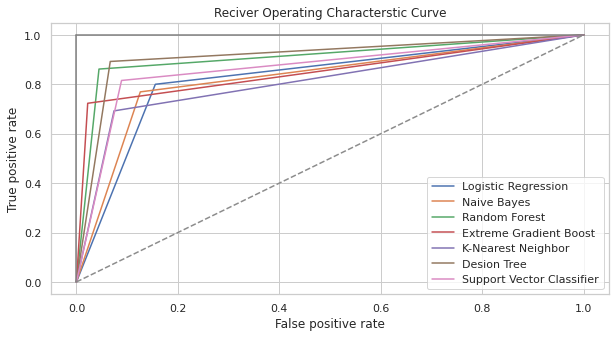

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls = '--')
plt.plot([0,0],[1,0],c = '.5')
plt.plot([1,1],c = '.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

## Synthetic Data Model Evaluation


In [ ]:
synthetic_model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
synthetic_model_ev

Model  Accuracy
0     Logistic Regression      83.0
1             Naive Bayes      84.0
2           Random Forest      92.5
3  Extreme Gradient Boost      89.5
4     K-Nearest Neighbour      85.0
5           Decision Tree      92.0
6  Support Vector Machine      88.0

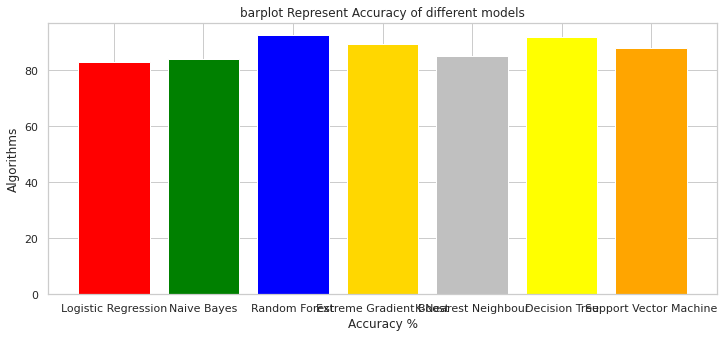

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(synthetic_model_ev['Model'], synthetic_model_ev['Accuracy'], color = colors)
plt.show()

## Ensembling

In [ ]:
scv = StackingCVClassifier(classifiers = [xgb,knn,svc], meta_classifier = svc, random_state = 42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


[18:56:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:56:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[18:56:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[123  12]
 [ 12  53]]


Accuracy of StackingCVClassifier: 88.0 

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       135
           1       0.82      0.82      0.82        65

   micro avg       0.88      0.88      0.88       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.88      0.88      0.88       200



## Comparison:

In [ ]:
# Preview the synthetic dataset
synthetic_correlated.head(10)

age  sex  cp  trestbps   chol  ...   oldpeak  slope  ca  thal  target
0  36.0    1   0     141.0  547.0  ...  1.817991      1   1     3       0
1  38.0    1   3     114.0  321.0  ...  2.327488      0   4     2       1
2  54.0    1   0      98.0  240.0  ...  2.547905      1   3     0       0
3  75.0    0   2     124.0  130.0  ...  4.515951      0   1     0       0
4  49.0    1   3     159.0  371.0  ...  0.938856      2   0     0       0
5  40.0    0   0     171.0  228.0  ...  0.525666      0   4     1       1
6  40.0    1   0      96.0  271.0  ...  2.564087      1   3     0       0
7  61.0    0   0     179.0  466.0  ...  2.905879      0   4     2       1
8  45.0    0   2     164.0  445.0  ...  3.057461      1   4     3       1
9  52.0    0   2     174.0  497.0  ...  1.123248      1   4     2       0

[10 rows x 14 columns]

Text(0.5, 1.0, 'original data pie for sex')

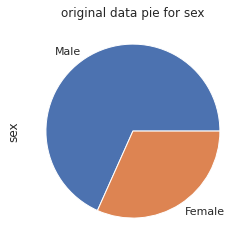

In [ ]:
counts = data['sex'].value_counts().sort_values(ascending = False)
counts.rename({1:"Male", 0:"Female"}).plot.pie()
plt.title("original data pie for sex")



Text(0.5, 1.0, 'synthetic data pie for sex')

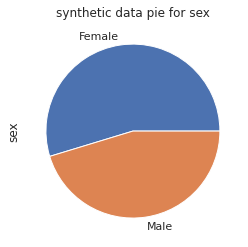

In [ ]:
counts = synthetic_correlated['sex'].astype(int).value_counts().sort_values(ascending=False)
counts.rename({1:"Male", 0:"Female"}).plot.pie()
plt.title("synthetic data pie for sex")

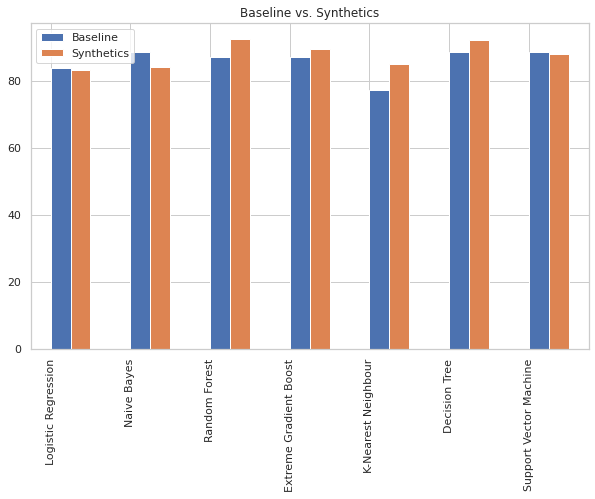

In [ ]:
import seaborn as sns
import matplotlib.pyplot as pyplot

# Notebook baseline accuracies (without synthetics)
baseline_accuracies = {'Logistic Regression': 83.606557,
 'Naive Bayes': 88.52459016393442,
 'Random Forest': 86.88524590163934,
 'Extreme Gradient Boost': 86.88524590163934,
 'K-Nearest Neighbour': 77.04918032786885,
 'Decision Tree': 88.52459016393442,
 'Support Vector Machine': 88.524590}
accuracies = {'Logistic Regression': 83.0,
 'Naive Bayes': 84.0,
 'Random Forest': 92.5,
 'Extreme Gradient Boost': 89.5,
 'K-Nearest Neighbour': 85.0,
 'Decision Tree': 92.0,
 'Support Vector Machine': 88.0}

comparison = pd.DataFrame([baseline_accuracies, accuracies], index=['Baseline', 'Synthetics'])
fig = plt.figure(figsize = (10, 6)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
comparison.T.plot(kind = 'bar', ax = ax, position = 0, legend = True).set_title("Baseline vs. Synthetics")
plt.show()

In [ ]:
comparison

Logistic Regression  ...  Support Vector Machine
Baseline              83.606557  ...                88.52459
Synthetics            83.000000  ...                88.00000

[2 rows x 7 columns]

In [ ]:
synth_avg_score = np.average([float(x) for x in accuracies.values()])
orig_avg_score = np.average([float(x) for x in baseline_accuracies.values()])
print(f"Synthetics average accuracy: {synth_avg_score:.2f}%, original: "
      f"{orig_avg_score:.2f}%. Improvement: {synth_avg_score - orig_avg_score:.2f}%")

Synthetics average accuracy: 87.71%, original: 85.71%. Improvement: 2.00%


Conclusion

1) The Trees model gives a better improvement after using the synthetic data. (In original dataset: Random Forest from 86% -> 92.5%, Decision Tree from 82% -> 92%.)

2) Ensembling technique did not increase the accuracy of the model in the synthetic dataset. (from 90% -> 88%)

3) The improvement by producing a synthetic dataset that is balanced did not show significant improvement. (only 2%)

# Synthetic Data Fairness Measures - Correlated Mode

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators = 20, random_state = 12,max_depth = 5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[129   6]
 [  9  56]]


Accuracy of Random Forest: 92.5 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       135
           1       0.90      0.86      0.88        65

   micro avg       0.93      0.93      0.93       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.93      0.92       200



In [ ]:
print("Performance for female subpopulation \n")
rf_predicted_female = rf.predict(X_test[np.isin(idx_test, idx_female)])
rf_conf_matrix_female = confusion_matrix(np.array(y_test)[np.isin(idx_test, idx_female)], 
                                          rf_predicted_female)
rf_acc_score_female = accuracy_score(np.array(y_test)[np.isin(idx_test, idx_female)], 
                                      rf_predicted_female)
print("confussion matrix")
print(rf_conf_matrix_female)
print("\n")
print("Accuracy of Random Forest Classifier:",rf_acc_score_female*100,'\n')

print(classification_report(np.array(y_test)[np.isin(idx_test, idx_female)],
                            rf_predicted_female))

Performance for female subpopulation 

confussion matrix
[[55  5]
 [ 2 48]]


Accuracy of Random Forest Classifier: 93.63636363636364 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        60
           1       0.91      0.96      0.93        50

   micro avg       0.94      0.94      0.94       110
   macro avg       0.94      0.94      0.94       110
weighted avg       0.94      0.94      0.94       110



In [ ]:
print("Performance for male subpopulation \n")
rf_predicted_male = rf.predict(X_test[np.isin(idx_test, idx_male)])
rf_conf_matrix_male = confusion_matrix(np.array(y_test)[np.isin(idx_test, idx_male)], 
                                          rf_predicted_male)
rf_acc_score_male = accuracy_score(np.array(y_test)[np.isin(idx_test, idx_male)], 
                                      rf_predicted_male)
print("confussion matrix")
print(rf_conf_matrix_male)
print("\n")
print("Accuracy of StackingCVClassifier:",rf_acc_score_male*100,'\n')

print(classification_report(np.array(y_test)[np.isin(idx_test, idx_male)],
                            rf_predicted_male))

Performance for male subpopulation 

confussion matrix
[[74  1]
 [ 7  8]]


Accuracy of StackingCVClassifier: 91.11111111111111 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.89      0.53      0.67        15

   micro avg       0.91      0.91      0.91        90
   macro avg       0.90      0.76      0.81        90
weighted avg       0.91      0.91      0.90        90



In [ ]:
# calculate the difference in accuracy
rf_acc_score_male - rf_acc_score_female

# the accuracy for males is 1.6% higher than for females

-0.025252525252525304

In [ ]:
# calculate the diff in FPR = FP/(FP + TN)

tn_m, fp_m, fn_m, tp_m = rf_conf_matrix_male.ravel()
tn_f, fp_f, fn_f, tp_f = rf_conf_matrix_female.ravel()

fpr_m = fp_m / (fp_m + tn_m)
fpr_f = fp_f / (fp_f + tn_f)

print("Male FPR: ", fpr_m, "Female FPR: ", fpr_f)


Male FPR:  0.013333333333333334 Female FPR:  0.08333333333333333


In [ ]:
# calculate the diff in FNR = FN/(FN + TP)

fnr_m = fn_m / (fn_m + tp_m)
fnr_f = fn_f / (fn_f + tp_f)

print("Male FNR: ", fnr_m, "Female FNR: ", fnr_f)

Male FNR:  0.4666666666666667 Female FNR:  0.04
